# Lab Assignment Four: Multi-Layer Perceptron 
In this lab, you will compare the performance of multi-layer perceptrons programmed  via your own various implementations. 

This report is worth 10% of the final grade. Please upload a report (one per team) with all code used, visualizations, and text in a rendered Jupyter notebook. Any visualizations that cannot be embedded in the notebook, please provide screenshots of the output. The results should be reproducible using your report. This lab project is slightly different from other reports in that you will be asked to complete more specific items.

### Dataset Selection

For this assignment, you will be using a specific dataset chosen by the instructor.  This is US Census data available on Kaggle, and also downloadable from the following link: https://www.dropbox.com/s/bf7i7qjftk7cmzq/acs2017_census_tract_data.csv?dl=0Links to an external site.

The Kaggle description appears here: https://www.kaggle.com/muonneutrino/us-census-demographic-data/dataLinks to an external site. 

The classification task you will be performing is to predict, for each tract, what the child poverty rate will be. You will need to convert this from regression to four levels of classification by quantizing the variable of interest. 

### Grading Rubric

#### Load, Split, and Balance (**1.5 points total**)
- [**.5 points**] 
    - (1) Load the data into memory and save it to a pandas data frame. **Do not** normalize or one-hot encode any of the features until asked to do so later in the rubric. 
    - (2) Remove any observations that having missing data. 
    - (3) Encode any string data as integers for now. 
    - (4) You have the option of keeping the "county" variable or removing it. Be sure to discuss why you decided to keep/remove this variable. 

# **1. Load, Split, & Balance**

In [38]:
import pandas as pd
import numpy as np
import missingno as msno

# Scikit-learn
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split

# Visualizations
import matplotlib.pyplot as plt
import seaborn as sns

### 1.1 Load Data

In [41]:
path = '../Data/acs2017_census_tract_data.csv'

df = pd.read_csv(path)
df.head(5)

,TractId,State,County,TotalPop,Men,Women,Hispanic,White,Black,Native,...,Walk,OtherTransp,WorkAtHome,MeanCommute,Employed,PrivateWork,PublicWork,SelfEmployed,FamilyWork,Unemployment
0,1001020100,Alabama,Autauga County,1845,899,946,2.4,86.3,5.2,0.0,...,0.5,0.0,2.1,24.5,881,74.2,21.2,4.5,0.0,4.6
1,1001020200,Alabama,Autauga County,2172,1167,1005,1.1,41.6,54.5,0.0,...,0.0,0.5,0.0,22.2,852,75.9,15.0,9.0,0.0,3.4
2,1001020300,Alabama,Autauga County,3385,1533,1852,8.0,61.4,26.5,0.6,...,1.0,0.8,1.5,23.1,1482,73.3,21.1,4.8,0.7,4.7
3,1001020400,Alabama,Autauga County,4267,2001,2266,9.6,80.3,7.1,0.5,...,1.5,2.9,2.1,25.9,1849,75.8,19.7,4.5,0.0,6.1
4,1001020500,Alabama,Autauga County,9965,5054,4911,0.9,77.5,16.4,0.0,...,0.8,0.3,0.7,21.0,4787,71.4,24.1,4.5,0.0,2.3


In [43]:
df.describe()

,TractId,TotalPop,Men,Women,Hispanic,White,Black,Native,Asian,Pacific,...,Walk,OtherTransp,WorkAtHome,MeanCommute,Employed,PrivateWork,PublicWork,SelfEmployed,FamilyWork,Unemployment
count,7.400100e+04,74001.000000,74001.000000,74001.000000,73305.000000,73305.000000,73305.00000,73305.000000,73305.000000,73305.000000,...,73200.000000,73200.000000,73200.000000,73055.000000,74001.000000,73190.000000,73190.000000,73190.000000,73190.000000,73191.000000
mean,2.839113e+10,4384.716017,2157.710707,2227.005311,17.265444,61.309043,13.28910,0.734047,4.753691,0.147341,...,3.042825,1.894605,4.661466,26.056594,2049.152052,79.494222,14.163342,6.171484,0.171164,7.246738
std,1.647593e+10,2228.936729,1120.560504,1146.240218,23.073811,30.634461,21.60118,4.554247,8.999888,1.029250,...,5.805753,2.549374,4.014940,7.124524,1138.865457,8.126383,7.328680,3.932364,0.456580,5.227624
min,1.001020e+09,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.303901e+10,2903.000000,1416.000000,1465.000000,2.600000,38.000000,0.80000,0.000000,0.200000,0.000000,...,0.400000,0.400000,2.000000,21.100000,1276.000000,75.200000,9.300000,3.500000,0.000000,3.900000
50%,2.804700e+10,4105.000000,2007.000000,2082.000000,7.400000,70.400000,3.80000,0.000000,1.500000,0.000000,...,1.400000,1.200000,3.800000,25.400000,1895.000000,80.600000,13.000000,5.500000,0.000000,6.000000
75%,4.200341e+10,5506.000000,2707.000000,2803.000000,21.100000,87.700000,14.60000,0.400000,5.000000,0.000000,...,3.300000,2.500000,6.300000,30.300000,2635.000000,85.000000,17.600000,8.000000,0.000000,9.000000
max,7.215375e+10,65528.000000,32266.000000,33262.000000,100.000000,100.000000,100.00000,100.000000,100.000000,71.900000,...,100.000000,100.000000,100.000000,73.900000,28945.000000,100.000000,100.000000,100.000000,22.300000,100.000000


In [45]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 74001 entries, 0 to 74000
Data columns (total 37 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   TractId           74001 non-null  int64  
 1   State             74001 non-null  object 
 2   County            74001 non-null  object 
 3   TotalPop          74001 non-null  int64  
 4   Men               74001 non-null  int64  
 5   Women             74001 non-null  int64  
 6   Hispanic          73305 non-null  float64
 7   White             73305 non-null  float64
 8   Black             73305 non-null  float64
 9   Native            73305 non-null  float64
 10  Asian             73305 non-null  float64
 11  Pacific           73305 non-null  float64
 12  VotingAgeCitizen  74001 non-null  int64  
 13  Income            72885 non-null  float64
 14  IncomeErr         72885 non-null  float64
 15  IncomePerCap      73256 non-null  float64
 16  IncomePerCapErr   73256 non-null  float6

#### Checking for Missing Data

<Axes: >

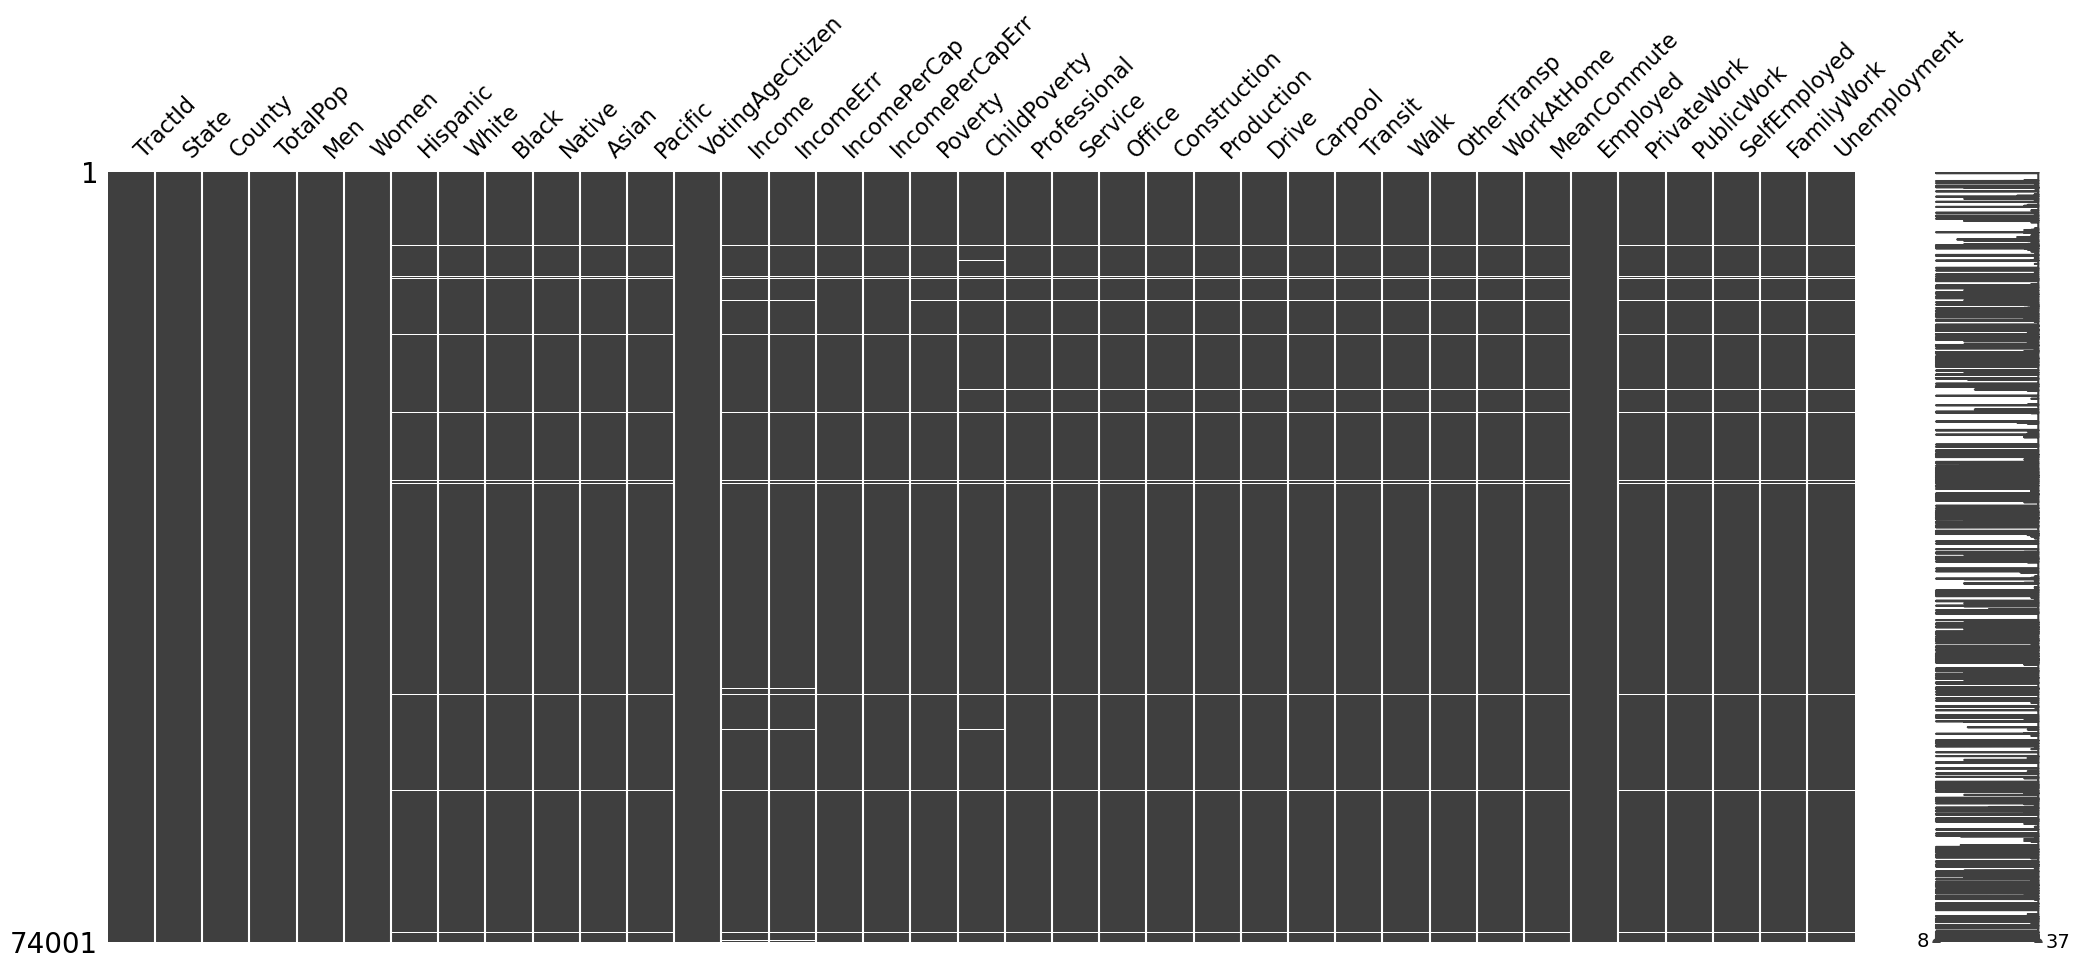

In [50]:
# Show missing data
msno.matrix(df)

#### Removing Observations with Missing Data

<Axes: >

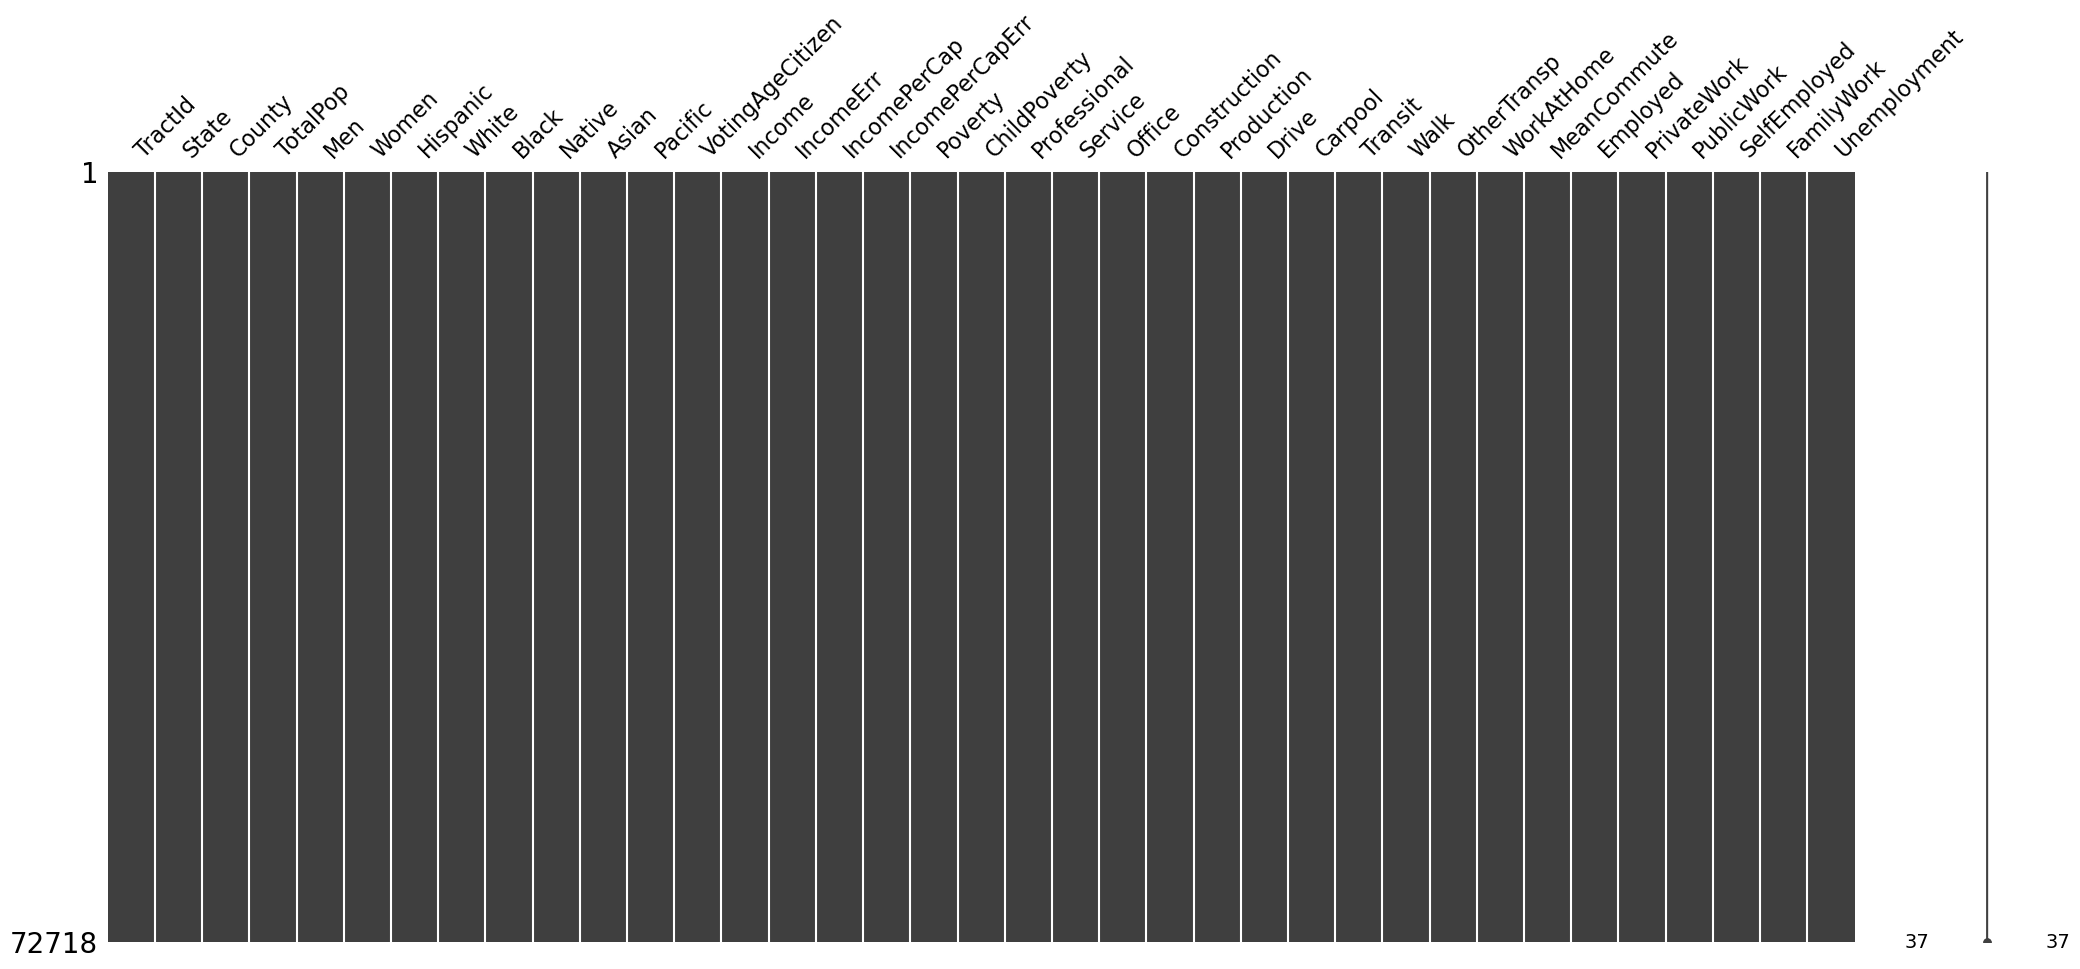

In [53]:
# Drop missing data
df_cleaned = df.dropna()

# Verify missing data dropped
msno.matrix(df_cleaned)

In [55]:
# Resetting the index
df_cleaned = df_cleaned.reset_index(drop=True)

In [57]:
df_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 72718 entries, 0 to 72717
Data columns (total 37 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   TractId           72718 non-null  int64  
 1   State             72718 non-null  object 
 2   County            72718 non-null  object 
 3   TotalPop          72718 non-null  int64  
 4   Men               72718 non-null  int64  
 5   Women             72718 non-null  int64  
 6   Hispanic          72718 non-null  float64
 7   White             72718 non-null  float64
 8   Black             72718 non-null  float64
 9   Native            72718 non-null  float64
 10  Asian             72718 non-null  float64
 11  Pacific           72718 non-null  float64
 12  VotingAgeCitizen  72718 non-null  int64  
 13  Income            72718 non-null  float64
 14  IncomeErr         72718 non-null  float64
 15  IncomePerCap      72718 non-null  float64
 16  IncomePerCapErr   72718 non-null  float6

#### Encoding String Data as Integers

In [60]:
# Check unique values before encoding
df["State"].unique()

array(['Alabama', 'Alaska', 'Arizona', 'Arkansas', 'California',
       'Colorado', 'Connecticut', 'Delaware', 'District of Columbia',
       'Florida', 'Georgia', 'Hawaii', 'Idaho', 'Illinois', 'Indiana',
       'Iowa', 'Kansas', 'Kentucky', 'Louisiana', 'Maine', 'Maryland',
       'Massachusetts', 'Michigan', 'Minnesota', 'Mississippi',
       'Missouri', 'Montana', 'Nebraska', 'Nevada', 'New Hampshire',
       'New Jersey', 'New Mexico', 'New York', 'North Carolina',
       'North Dakota', 'Ohio', 'Oklahoma', 'Oregon', 'Pennsylvania',
       'Rhode Island', 'South Carolina', 'South Dakota', 'Tennessee',
       'Texas', 'Utah', 'Vermont', 'Virginia', 'Washington',
       'West Virginia', 'Wisconsin', 'Wyoming', 'Puerto Rico'],
      dtype=object)

In [62]:
# Encoding State
le = LabelEncoder()

# Fit and transform
df["State"] = le.fit_transform(df["State"])

# Check transformed values
df["State"].unique()

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
       34, 35, 36, 37, 38, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51,
       39])

In [64]:
# Count unique values for county
df["County"].nunique()

1955

#### Dropping Attributes

In [66]:
df = df.drop(['TractId', 'County'], axis= 1)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 74001 entries, 0 to 74000
Data columns (total 35 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   State             74001 non-null  int64  
 1   TotalPop          74001 non-null  int64  
 2   Men               74001 non-null  int64  
 3   Women             74001 non-null  int64  
 4   Hispanic          73305 non-null  float64
 5   White             73305 non-null  float64
 6   Black             73305 non-null  float64
 7   Native            73305 non-null  float64
 8   Asian             73305 non-null  float64
 9   Pacific           73305 non-null  float64
 10  VotingAgeCitizen  74001 non-null  int64  
 11  Income            72885 non-null  float64
 12  IncomeErr         72885 non-null  float64
 13  IncomePerCap      73256 non-null  float64
 14  IncomePerCapErr   73256 non-null  float64
 15  Poverty           73159 non-null  float64
 16  ChildPoverty      72891 non-null  float6

#### Reasons for Dropping Attributes

1. **Dropping `County`:**
   - We chose to drop the `County` variable because it contains **1954 unique values**. Retaining this attribute and applying one-hot encoding would significantly increase the dimensionality of our dataset, leading to high memory consumption and potential difficulties in model training. The large number of unique values could also introduce noise and reduce the model's ability to generalize.

2. **Dropping `TractID`:**
   - We decided to drop the `TractID` variable as it serves merely as a **unique identifier** for each tract. It does not provide meaningful information relevant to our predictive modeling task. Including this attribute could lead to overfitting, where the model learns specific patterns tied to tract IDs rather than generalizable trends in the data.

- The next two requirements will need to be completed together as they might depend on one another:
    - [**.5 points**] 
        - Balance the dataset so that about the same number of instances are within each class. 
        - Choose a method for balancing the dataset and explain your reasoning for selecting this method. 
        - One option is to choose quantization thresholds for the "ChildPoverty" variable that equally divide the data into four classes. 
        - Should balancing of the dataset be done for both the training and testing set? Explain.
    - [**.5 points**] 
        - Assume you are equally interested in the classification performance for each class in the dataset. 
        - Split the dataset into 80% for training and 20% for testing. There is **no need** to split the data multiple times for this lab.
- **Note**: You will need to one hot encode the target, but do not one hot encode the categorical data until instructed to do so in the lab. 

### 1.2 Splitting & Balancing the Dataset

In [70]:
df['ChildPoverty'].describe()

count    72891.000000
mean        21.155872
std         18.645759
min          0.000000
25%          6.200000
50%         16.300000
75%         31.600000
max        100.000000
Name: ChildPoverty, dtype: float64

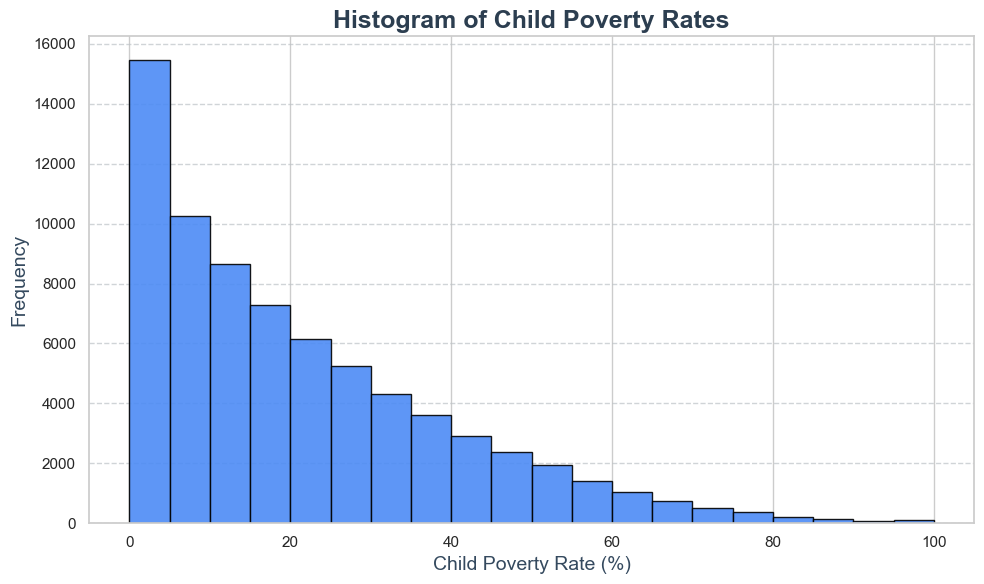

In [72]:
# Set the style for the plot
sns.set(style='whitegrid')

# Creating the histogram with a different color and style
plt.figure(figsize=(10, 6))
plt.hist(df['ChildPoverty'], bins=20, color='#4c8bf5', edgecolor='black', alpha=0.9)

# Adding titles and labels
plt.title('Histogram of Child Poverty Rates', fontsize=18, fontweight='bold', color='#2c3e50')
plt.xlabel('Child Poverty Rate (%)', fontsize=14, color='#34495e')
plt.ylabel('Frequency', fontsize=14, color='#34495e')

# Adding grid for better readability
plt.grid(axis='y', linestyle='--', alpha=0.7, color='#bdc3c7')

# Adjust layout for better spacing
plt.tight_layout()

# Show the plot
plt.show()

According to the US census (source: https://www.census.gov/library/stories/2022/10/poverty-rate-varies-by-age-groups.html), the national child poverty rate stands at 16.9%, with significant variation among states. For example, Utah has one of the lowest rates at 8.1%, while Mississippi reports one of the highest at 27.7%.

To address this range, we have established three quantization thresholds:

- 8.2% to represent the lowest rate,
- 16.9% as the national average,
- 27.7% for the highest rate of child poverty.
  
This quantization approach effectively reflects the varying levels of child poverty across the states, capturing both extremes and the national trend.

#### Balancing the Dataset

In [75]:
# Define the bins based on the custom thresholds and add infinity for the last range
bins = [-np.inf, 8.2, 16.9, 27.7, np.inf]

# Define corresponding labels for each group
labels = [0, 1, 2, 3]

# Using pd.cut() to categorize 'ChildPoverty' based on custom thresholds
df['ChildPoverty'] = pd.cut(df['ChildPoverty'], bins=bins, labels=labels)

# Check the distribution after binning and sort by class labels
print(df['ChildPoverty'].value_counts().sort_index())

ChildPoverty
0    22532
1    14911
2    13472
3    21976
Name: count, dtype: int64


### Reasoning for Method Balancing
- We implemented quantization with custom thresholds to balance the ChildPoverty variable, leveraging meaningful real-world values (8.2%, 16.9%, and 27.7%). These thresholds align with important national benchmarks, helping us categorize the data into four interpretable classes:
    1. Low Poverty: Below 8.2%
    2. Average Poverty: 8.2% to 16.9%
    3. High Poverty: 16.9% to 27.7%
    4. Very High Poverty: Above 27.7%
- This approach enhances contextual relevance compared to arbitrary statistical quartiles, which might not capture the real-world significance of poverty rates. While the number of instances across classes might not be perfectly balanced, the method ensures that the categories reflect meaningful differences.
- Using real-world thresholds also helps mitigate the bias that may arise from purely statistical quantization methods, such as quartiles or deciles, which may not align with significant child poverty patterns.

#### Splitting the Dataset

In [79]:
# Define X features and Y target
X = df.drop(['ChildPoverty'], axis=1)
y = df['ChildPoverty']

# 80/20 split training and test data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [81]:
# Shapes for the Splits
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(59200, 34)
(59200,)
(14801, 34)
(14801,)


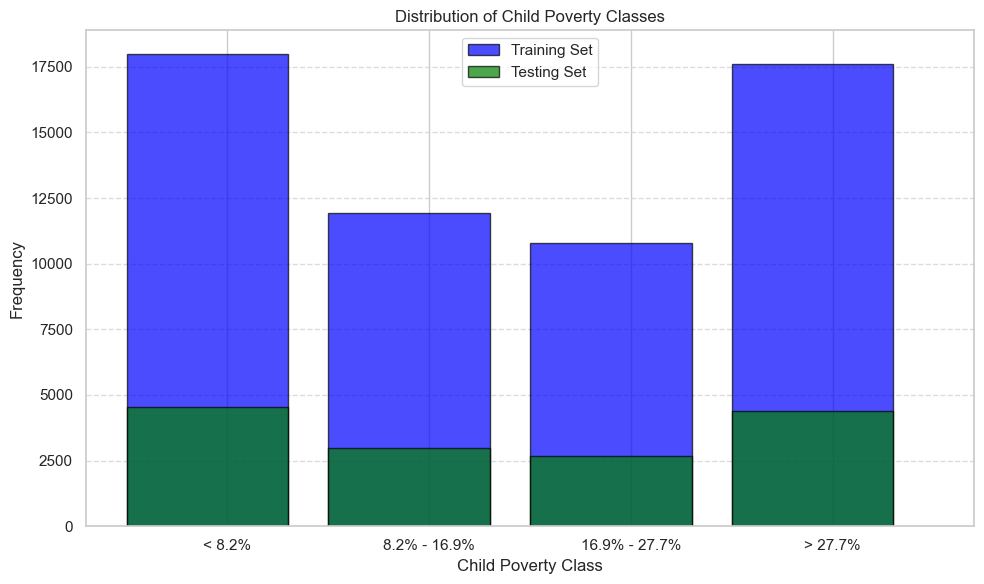

In [83]:
# Sets figure size
plt.figure(figsize=(10, 6))

# Defines the bin edges to ensure proper alignment with the ticks
bins = np.array([-0.5, 0.5, 1.5, 2.5, 3.5])  # Creates bins that match the classes

# Sets the width of the bars
bar_width = 0.8  # Wider bar width for better alignment

# Plots histograms for both training and testing sets
plt.hist(y_train, bins=bins, width=bar_width, alpha=0.7, label='Training Set', color='blue', edgecolor='black', align='mid')
plt.hist(y_test, bins=bins, width=bar_width, alpha=0.7, label='Testing Set', color='green', edgecolor='black', align='mid')

# Customizes the plot
plt.title('Distribution of Child Poverty Classes')
plt.xlabel('Child Poverty Class')
plt.ylabel('Frequency')

# Sets x-ticks to match the center of the bins
plt.xticks(ticks=[0, 1, 2, 3], labels=['< 8.2%', '8.2% - 16.9%', '16.9% - 27.7%', '> 27.7%'])

# Adds legend
plt.legend()

# Adds grid lines for better readability
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Adjusts layout for better spacing
plt.tight_layout()
plt.show()

In [85]:
# Shows the percentage of each quantile in the dataset in the training set and in the testing set
print("Train Set:")
print(y_train.value_counts(normalize=True) * 100)
print("Test Set:")
print(y_test.value_counts(normalize=True) * 100)

Train Set:
ChildPoverty
0    30.850772
3    30.173242
1    20.473413
2    18.502573
Name: proportion, dtype: float64
Test Set:
ChildPoverty
0    31.156192
3    30.052772
1    20.389281
2    18.401755
Name: proportion, dtype: float64


### Class Proportions in Training and Testing Sets

1. **Balanced Distribution**:
- The proportions of classes in both the training and testing sets are relatively close. This ensures that both sets maintain a similar distribution of ChildPoverty classes. A balanced distribution is crucial for the model's performance, as it ensures the training data provides a representative sample for what the model will encounter during testing.
2. **Class Distribution Observations:
- Class 0 (Lowest child poverty) and Class 3 (Highest child poverty) have the highest proportions in both sets, indicating that these categories are more common in the dataset.
- Class 1 (Average child poverty) and Class 2 (Above average child poverty) appear less frequently, suggesting that these classes may be less prevalent in the overall data.
3. Implications for Model Training:
- Since the training set has a good representation of all classes, the model is less likely to become biased towards the majority classes (e.g., Class 0 or Class 3). This helps the model generalize better.
- The similar class distribution in the testing set ensures that the model's performance evaluation is fair and not skewed by any class imbalance, reflecting real-world conditions accurately.